# Imbalance Data

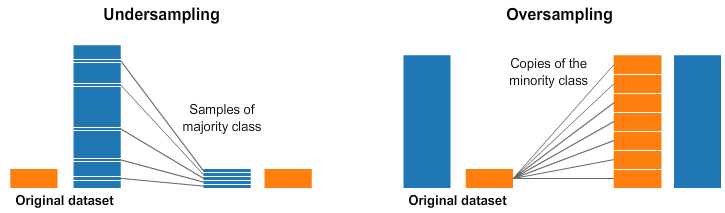

# Load Dataset

In [106]:
import pandas as pd 
df = pd.read_csv("student-scores.csv")
# drop columns
df.drop(columns=['id','first_name','last_name','email'], inplace=True)
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [107]:
# check classes 
df['career_aspiration'].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

# 1 Data Preprocessing Step

# Encoding Categorical Column

In [101]:
from sklearn.preprocessing import LabelEncoder

cols = ['gender','part_time_job','extracurricular_activities','career_aspiration']

encoder = LabelEncoder()

for col in cols:
    df[col] = encoder.fit_transform(df[col])
    
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,0,3,0,27,9,73,81,93,97,63,80,87
1,0,0,2,0,47,6,90,86,96,100,90,88,90
2,0,0,9,1,13,8,81,97,95,96,65,77,94
3,0,0,5,0,3,1,71,74,88,80,89,63,86
4,1,0,5,0,10,15,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,2,0,30,4,83,77,84,73,75,84,82
1996,1,0,2,0,20,12,89,65,73,80,87,67,73
1997,0,0,5,0,14,12,97,85,63,93,68,94,78
1998,0,1,10,1,5,3,51,96,72,89,95,88,75


# Scalling: Standarizatoin (standardscaler)

In [102]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
scale_cols = ['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score',
              'physics_score', 'chemistry_score', 'biology_score',
              'english_score', 'geography_score']

scaler = StandardScaler()

df[scale_cols] = scaler.fit_transform(df[scale_cols])
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,0,-0.253175,0,0.762334,9,-0.790525,0.052463,0.930377,1.331147,-1.208673,-0.106245,0.525321
1,0,0,-0.633604,0,2.411605,6,0.495250,0.445147,1.169682,1.565986,0.759435,0.559086,0.783168
2,0,0,2.029397,1,-0.392155,8,-0.185454,1.309054,1.089913,1.252867,-1.062888,-0.355744,1.126964
3,0,0,0.507682,0,-1.216791,1,-0.941792,-0.497296,0.531536,0.000391,0.686542,-1.520075,0.439372
4,1,0,0.507682,0,-0.639546,15,0.041447,-0.261685,-1.303134,-1.173804,0.030506,-0.605244,-0.420119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,-0.633604,0,1.009725,4,-0.034186,-0.261685,0.212463,-0.547567,-0.333959,0.226421,0.095575
1996,1,0,-0.633604,0,0.185089,12,0.419616,-1.204128,-0.664988,0.000391,0.540756,-1.187409,-0.677966
1997,0,0,0.507682,0,-0.309692,12,1.024687,0.366610,-1.462670,1.018028,-0.844209,1.058085,-0.248221
1998,0,1,2.409825,1,-1.051864,3,-2.454469,1.230517,-0.744756,0.704909,1.123899,0.559086,-0.506068


# Balancing Dataset 

Over and Under Sampler

In [103]:
# Split the dataframe into separate DataFrames for each class
classes = df['career_aspiration'].unique()
df_list = [df[df['career_aspiration'] == label] for label in classes]


# Resample each class to match the max_size
df_upsampled = [resample(sub_df,
                         replace=True,      # sample with replacement
                         n_samples=32, # to match majority class
                         random_state=42)    # reproducible results
                for sub_df in df_list]

# Combine back into a single DataFrame
df = pd.concat(df_upsampled)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['career_aspiration'].value_counts()

career_aspiration
7     32
11    32
0     32
10    32
8     32
15    32
9     32
4     32
13    32
6     32
14    32
1     32
16    32
3     32
2     32
12    32
5     32
Name: count, dtype: int64

# Train Test Split

In [104]:
from sklearn.model_selection import train_test_split 

X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (435, 12)
Test shape: (109, 12)


# Without Balance Data results

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))
print("Classification Report \n", classification_report(y_test, y_pred))


Confusion matrix 
 [[12  0  2  0  0  0  1  0  1  0  0  1  4  0  0  3  0]
 [ 0  3  0  3  0  0  0  2  0  0  3  0  0  0  0  3  0]
 [ 0  0  5  0  0  0  0  0  2  3  0  0 16  1  0  3  0]
 [ 0  0  0 64  0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  2  0  2  0  1  0  0  2  0  0  3  1  0  1  0]
 [ 0  0  1  0  0  0  0  1  1  1  0  0  4  1  2  5  0]
 [ 0  0  2  0  0  0 22  0  0  0  0  0  1  0  0  0  0]
 [ 0  2  0  2  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  1  0  0  3  0  2  0  1  0  1  2  1]
 [ 0  0  1  0  0  0  1  0  0 15  0  0 11  0  0  0  0]
 [ 0  3  1  2  0  0  0  1  2  0  2  0  0  0  0  3  0]
 [ 0  0  3  0  0  0  4  0  0  1  0  0  2  0  0  0  0]
 [ 1  0  1  0  0  0  4  0  0  4  0  0 43  0  0  0  0]
 [ 1  0  0  0  1  0  1  2  0  2  0  0  1  0  1  1  0]
 [ 0  0  7  0  0  0  0  0  0  0  1  0  2  0  5  1  0]
 [ 1  5  4  2  1  0  1  2  2  1  1  0 15  0  2 15  0]
 [ 0  0  0  0  0  1  0  0  0  3  0  0  0  0  0  1  0]]
Classification Report 
               precision    recall  f1-

# With Balanced (Oversampling) data Results

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))
print("Classification Report \n", classification_report(y_test, y_pred))


Confusion matrix 
 [[8 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 1 0 0 1 1 0 0 1 0 0 1 0]
 [0 0 0 7 0 0 0 1 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 3 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 4 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 1 0 0 0 2 0 0 1 0]
 [3 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 2 0 0 0 1 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 2 2 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]
Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.83      0.83      0.83         6
           2       0.67      0.29      0.40         7
           3       0.88      0.70      0.78        10
           4       0.55      0.86      0.67         7
  